<a href="https://colab.research.google.com/github/HRJ369/DH_307/blob/main/dh307_PT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_sit%20(1).csv'
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


    Time  pleth_1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0  0.000    66165         NaN         NaN         NaN         NaN         NaN   
1  0.002    66160         NaN         NaN         NaN         NaN         NaN   
2  0.004    66149         NaN         NaN         NaN         NaN         NaN   
3  0.006    66153         NaN         NaN         NaN         NaN         NaN   
4  0.008    66153         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  \
0         NaN         NaN         NaN          NaN          NaN          NaN   
1         NaN         NaN         NaN          NaN          NaN          NaN   
2         NaN         NaN         NaN          NaN          NaN          NaN   
3         NaN         NaN         NaN          NaN          NaN          NaN   
4         NaN         NaN         NaN          NaN          NaN          NaN   

   Unnamed: 13  Unnamed: 14  Unn

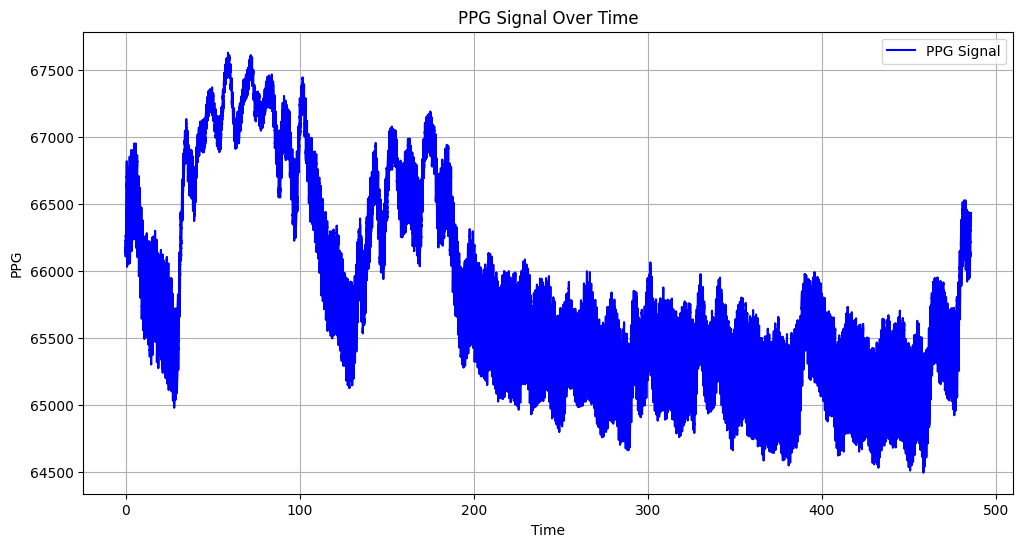

In [22]:
# Adjust these column names based on your dataset
time_column = 'Time'  # Replace with the actual name of the time column
ppg_column = 'pleth_1'    # Replace with the actual name of the PPG column

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(df[time_column], df[ppg_column], color='blue', label='PPG Signal')
plt.title('PPG Signal Over Time')
plt.xlabel('Time')
plt.ylabel('PPG')
plt.legend()
plt.grid()
plt.show()


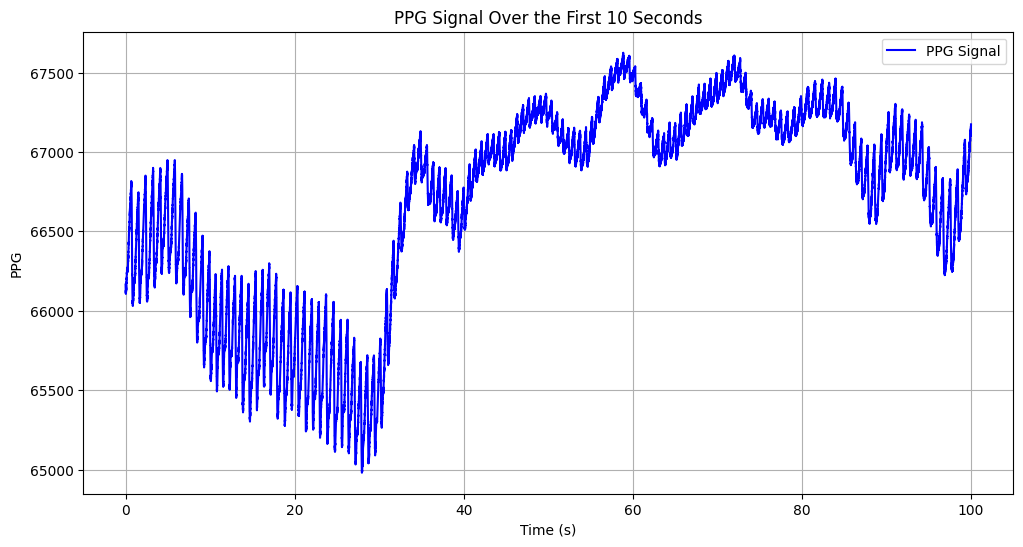

In [24]:
df_filtered = df[df[time_column] <= 100]
# Create a line plot for the first 10 seconds
plt.figure(figsize=(12, 6))
plt.plot(df_filtered[time_column], df_filtered[ppg_column], color='blue', label='PPG Signal')
plt.title('PPG Signal Over the First 10 Seconds')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.legend()
plt.grid()
plt.show()

     Time    Signal  Corrected_Signal
0  0.0000 -0.298537         -0.298537
1  0.1001  0.108737          0.040532
2  0.2002  0.170060          0.101855
3  0.3003  0.068205         -0.040532
4  0.4004  0.007384         -0.162676


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

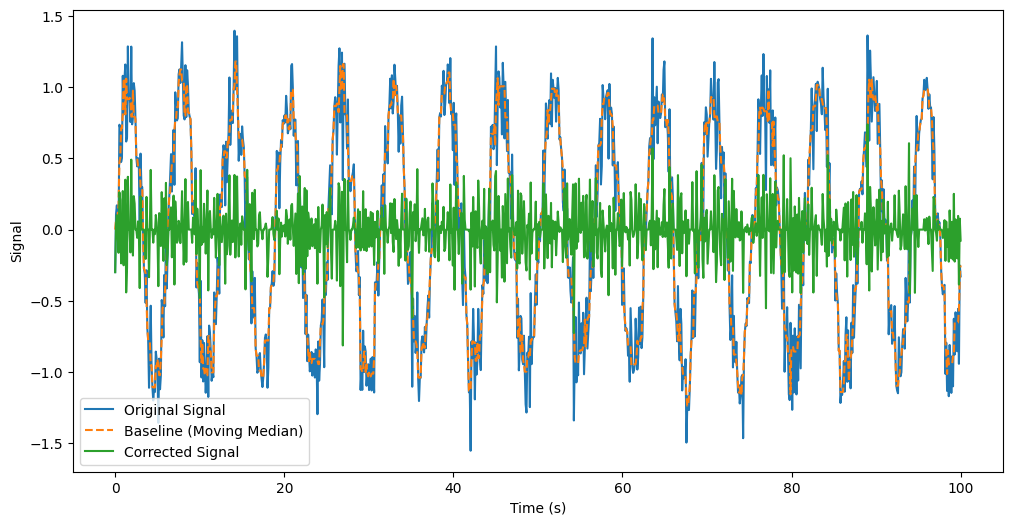

In [26]:
import pandas as pd
import numpy as np
from scipy.signal import medfilt

# Example: Create a sample DataFrame
# Assuming the DataFrame has a 'Time' column (in seconds) and a 'Signal' column (your data)
data = {
    'Time': np.linspace(0, 100, 1000),  # Simulating 100 data points over 10 seconds
    'Signal': np.sin(np.linspace(0, 100, 1000)) + 0.2*np.random.randn(1000)  # Adding some baseline drift
}
df = pd.DataFrame(data)

# Set the window size for the median filter (should be an odd number)
window_size = 5

# Apply the moving median filter
baseline = medfilt(df['Signal'], kernel_size=window_size)

# Subtract the baseline to remove the drift
df['Corrected_Signal'] = df['Signal'] - baseline

# Display the original, baseline, and corrected signal
print(df.head())

# Optional: Plotting the results to visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Signal'], label='Original Signal')
plt.plot(df['Time'], baseline, label='Baseline (Moving Median)', linestyle='--')
plt.plot(df['Time'], df['Corrected_Signal'], label='Corrected Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend()
plt.title



<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

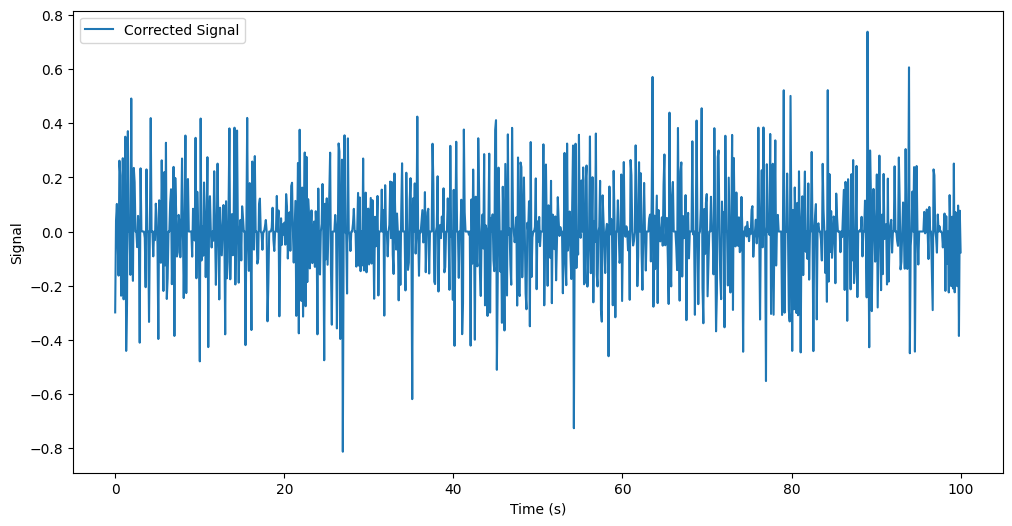

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Corrected_Signal'], label='Corrected Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend()
plt.title


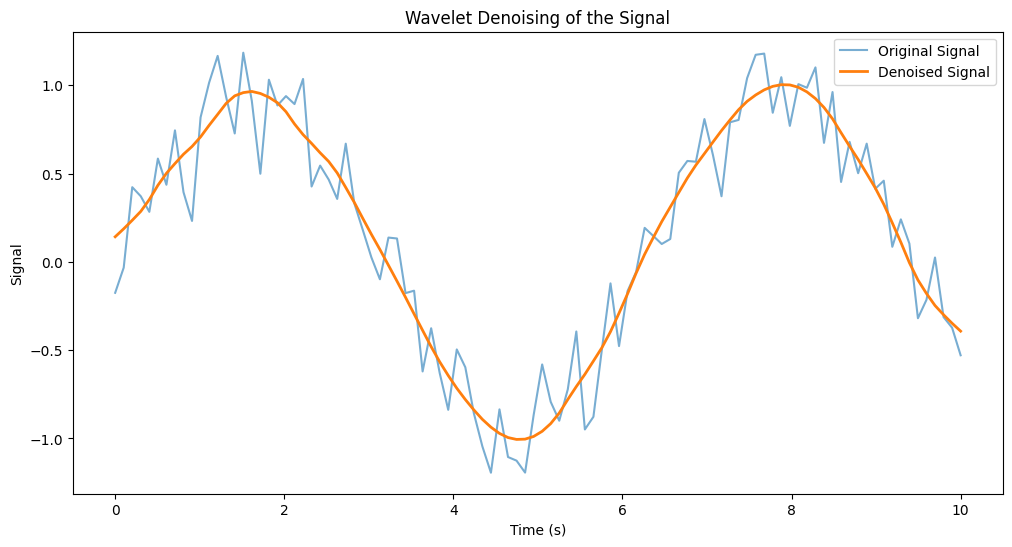

In [30]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Example: Create a sample DataFrame
# Assuming the DataFrame has a 'Time' column (in seconds) and a 'Signal' column (your data)
data = {
    'Time': np.linspace(0, 10, 100),  # Simulating 100 data points over 10 seconds
    'Signal': np.sin(np.linspace(0, 10, 100)) + 0.2*np.random.randn(100)  # Adding noise
}
df = pd.DataFrame(data)

# Perform wavelet transform for denoising
wavelet = 'db4'  # Daubechies wavelet
level = 3  # Level of decomposition

# Decompose the signal
coeffs = pywt.wavedec(df['Signal'], wavelet, level=level)

# Apply thresholding to the detail coefficients
threshold = np.sqrt(2 * np.log(len(df['Signal'])))
coeffs[1:] = [pywt.threshold(c, value=threshold, mode='soft') for c in coeffs[1:]]

# Reconstruct the denoised signal
denoised_signal = pywt.waverec(coeffs, wavelet)

# Add the denoised signal to the DataFrame
df['Denoised_Signal'] = denoised_signal[:len(df)]

# Plot the original and denoised signals
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Signal'], label='Original Signal', alpha=0.6)
plt.plot(df['Time'], df['Denoised_Signal'], label='Denoised Signal', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend()
plt.title('Wavelet Denoising of the Signal')
plt.show()

